# This time, we are going to look at WORLD datasets only.
### A quick breakdown of the datasets that we are going to be using:
Suicide Dataset: 1985 - 2016

Happiness Dataset: 2015


#### We will be using the year 2015 for cross dataset comparisons, and all years for suicide rate progression
This is because there are problems with the 2016 data (too incomplete)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

plotly.tools.set_credentials_file(username='ieching22', api_key='28VPsP5GenfxwZS7j3D5')

In [3]:
suicide_df = pd.read_csv('suicide-rates-overview-1985-to-2016/master.csv')
happy_df = pd.read_csv('world-happiness-report/2015.csv')

In [4]:
# cleaning up column names for suicide df
suicide_df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year', 'gdp_per_capita', 'generation']
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Plan:
We will first look at the suicide dataset by itself for all years and try to look for insights from it.

Then we will create a new dataset for suicide in 2015 only and compare it with the happiness and alcohol datasets

## Now let us look at the Suicide Dataset!

### Progression of Total Suicides per Year

In [5]:
years = suicide_df['year'].unique()
male_suicides = []
female_suicides = []
total_suicides = []

for year in years:
    suicides = suicide_df[suicide_df['year'] == year]['suicides_no'].sum()
    total_suicides.append(suicides)
    
    male = suicide_df[(suicide_df['year'] == year) & (suicide_df['sex'] == 'male')]['suicides_no'].sum()
    male_suicides.append(male)
    
    female = suicide_df[(suicide_df['year'] == year) & (suicide_df['sex'] == 'female')]['suicides_no'].sum()
    female_suicides.append(female)

In [6]:
year_df = pd.DataFrame([years, male_suicides, female_suicides, total_suicides]).transpose()
year_df.columns = ['Year', 'Male Suicides', 'Female Suicides', 'Total Suicides']
year_df.sort_values(by='Year', inplace=True)
year_df = year_df.iloc[:-1]

In [7]:
year_df

,Year,Male Suicides,Female Suicides,Total Suicides
22,1985,83584,32479,116063
23,1986,86818,33852,120670
0,1987,91836,35006,126842
1,1988,88011,33015,121026
2,1989,118883,41361,160244
24,1990,143243,50118,193361
25,1991,148398,49622,198020
3,1992,159906,51567,211473
4,1993,170234,51331,221565
5,1994,180531,51532,232063


In [8]:
total = go.Scatter(
    x = year_df['Year'],
    y = year_df['Total Suicides'],
    mode = 'lines+markers',
    name = 'Total Suicides'
)

male = go.Scatter(
    x = year_df['Year'],
    y = year_df['Male Suicides'],
    mode = 'lines+markers',
    name = 'Male Suicides'
)

female = go.Scatter(
    x = year_df['Year'],
    y = year_df['Female Suicides'],
    mode = 'lines+markers',
    name = 'Female Suicides'
)

data = [total, male, female]

# plotting the data

py.iplot(data)

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Let us look at some other trends

In [9]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [10]:
suicide_df[suicide_df['HDI for year'].isnull() == True]['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001,
       2002, 2003, 2004, 2006, 2007, 2008, 2009, 1985, 1986, 1990, 1991,
       1995, 2000, 2005, 2015, 2016, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

In [11]:
suicide_df[suicide_df['HDI for year'].isnull() == False]['year'].unique()

array([1995, 2000, 2005, 2010, 2012, 2013, 2014, 1985, 1990, 2011],
      dtype=int64)

### Let us look at GDP per Capita

In [12]:
country_year = suicide_df['country-year'].unique()

In [13]:
country_year_df = pd.DataFrame([country_year]).transpose()
country_year_df.columns = ['country-year']

In [14]:
def find_gdp_per_capita(country_year):
    gdp = suicide_df[suicide_df['country-year'] == country_year]['gdp_per_capita']
    return gdp.unique()[0]

def find_total_suicide_no(country_year):
    num = suicide_df[suicide_df['country-year'] == country_year]['suicides_no'].sum()
    return num

def find_total_population(country_year):
    pop = suicide_df[suicide_df['country-year'] == country_year]['population'].sum()
    return pop

In [15]:
find_gdp_per_capita('Albania1987')

796

In [16]:
country_year_df['gdp_per_capita'] = country_year_df['country-year'].apply(lambda x: find_gdp_per_capita(x))
country_year_df['suicides_no'] = country_year_df['country-year'].apply(lambda x: find_total_suicide_no(x))
country_year_df['population'] = country_year_df['country-year'].apply(lambda x: find_total_population(x))

In [17]:
country_year_df['suicides/100k population'] = country_year_df.apply(lambda x: (x['suicides_no'] / x['population']) * 100000, axis=1)

In [18]:
country_year_df.head()

,country-year,gdp_per_capita,suicides_no,population,suicides/100k population
0,Albania1987,796,73,2709600,2.694125
1,Albania1988,769,63,2764300,2.279058
2,Albania1989,833,68,2803100,2.425886
3,Albania1992,251,47,2822500,1.665190
4,Albania1993,437,73,2807300,2.600363


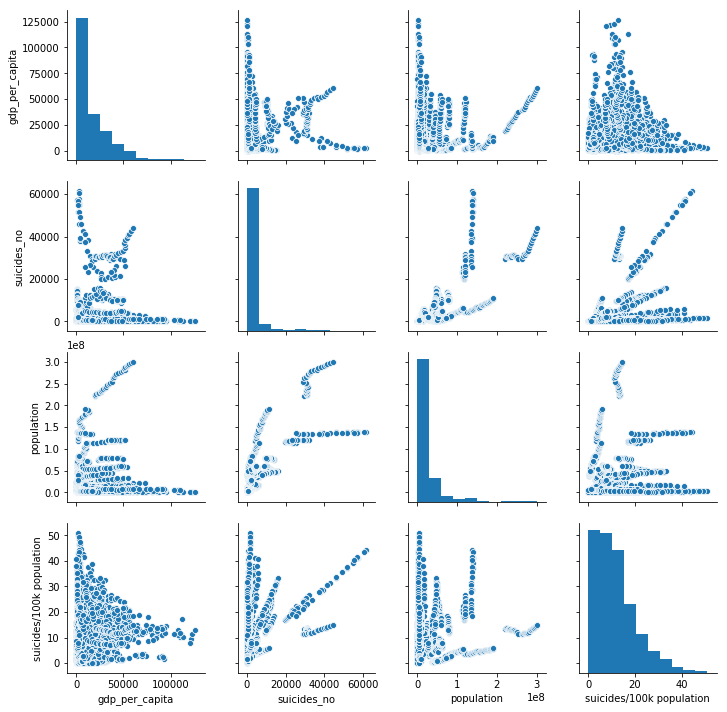

In [19]:
sns.pairplot(country_year_df)

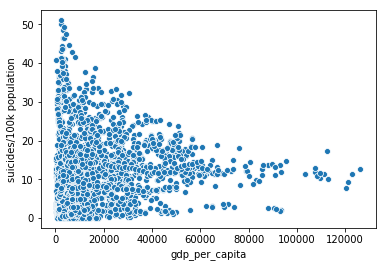

In [20]:
plot = sns.scatterplot(x='gdp_per_capita', y='suicides/100k population', data=country_year_df)
fig = plot.get_figure()
fig.savefig("gdp_vs_suicide_WORLD.png")

### Let us look at suicide rate progression per age group

In [21]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [22]:
suicide_df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [23]:
suicide_df[suicide_df['age'] == '75+ years']['country'].nunique()

101

#### The data seems to be relatively clean!

In [5]:
years = suicide_df['year'].unique()
suicide1 = []
suicide2 = []
suicide3 = []
suicide4 = []
suicide5 = []
suicide6 = []

for year in years:
    suicides = suicide_df[(suicide_df['age'] == '5-14 years') & (suicide_df['year'] == year)]['suicides_no'].sum()
    suicide1.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '15-24 years') & (suicide_df['year'] == year)]['suicides_no'].sum()
    suicide2.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '25-34 years') & (suicide_df['year'] == year)]['suicides_no'].sum()
    suicide3.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '35-54 years') & (suicide_df['year'] == year)]['suicides_no'].sum()
    suicide4.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '55-74 years') & (suicide_df['year'] == year)]['suicides_no'].sum()
    suicide5.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '75+ years') & (suicide_df['year'] == year)]['suicides_no'].sum()
    suicide6.append(suicides)

In [6]:
age_df = pd.DataFrame([years, suicide1, suicide2, suicide3, suicide4, suicide5, suicide6]).transpose()
age_df.columns = ['Year', '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
age_df.sort_values(by='Year', inplace=True)
age_df = age_df.iloc[:-1]

In [7]:
age_df.head()

,Year,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
22,1985,984,17870,20771,35748,28736,11954
23,1986,944,18063,21685,37558,29760,12660
0,1987,935,16432,22309,40649,32469,14048
1,1988,837,15337,21332,38770,30538,14212
2,1989,1150,18636,29427,53541,40087,17403


In [27]:
age1 = go.Scatter(
    x = age_df['Year'],
    y = age_df['5-14 years'],
    mode = 'lines+markers',
    name = '5-14 years'
)

age2 = go.Scatter(
    x = age_df['Year'],
    y = age_df['15-24 years'],
    mode = 'lines+markers',
    name = '15-24 years'
)

age3 = go.Scatter(
    x = age_df['Year'],
    y = age_df['25-34 years'],
    mode = 'lines+markers',
    name = '25-34 years'
)

age4 = go.Scatter(
    x = age_df['Year'],
    y = age_df['35-54 years'],
    mode = 'lines+markers',
    name = '35-54 years'
)

age5 = go.Scatter(
    x = age_df['Year'],
    y = age_df['55-74 years'],
    mode = 'lines+markers',
    name = '55-74 years'
)

age6 = go.Scatter(
    x = age_df['Year'],
    y = age_df['75+ years'],
    mode = 'lines+markers',
    name = '75+ years'
)

data = [age1, age2, age3, age4, age5, age6]

# plotting the data

py.iplot(data)

In [8]:
# Let us normalize the data and see the trends

from sklearn import preprocessing

# final_years = list(range(1985,2016))

# normalizing the age dataframe
x = age_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_age_df = pd.DataFrame(x_scaled)

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [29]:
normalized_age_df.columns = ['Year', '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
normalized_age_df.head()

,Year,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
0,0.000000,0.116852,0.154404,0.000000,0.000000,0.000000,0.000000
1,0.033333,0.085056,0.166169,0.041884,0.028755,0.030182,0.054682
2,0.066667,0.077901,0.066748,0.070479,0.077862,0.110027,0.162187
3,0.100000,0.000000,0.000000,0.025708,0.048010,0.053112,0.174890
4,0.133333,0.248808,0.201097,0.396664,0.282675,0.334561,0.422043


In [30]:
age1 = go.Scatter(
    x = age_df['Year'],
    y = normalized_age_df['5-14 years'],
    mode = 'lines+markers',
    name = '5-14 years'
)

age2 = go.Scatter(
    x = age_df['Year'],
    y = normalized_age_df['15-24 years'],
    mode = 'lines+markers',
    name = '15-24 years'
)

age3 = go.Scatter(
    x = age_df['Year'],
    y = normalized_age_df['25-34 years'],
    mode = 'lines+markers',
    name = '25-34 years'
)

age4 = go.Scatter(
    x = age_df['Year'],
    y = normalized_age_df['35-54 years'],
    mode = 'lines+markers',
    name = '35-54 years'
)

age5 = go.Scatter(
    x = age_df['Year'],
    y = normalized_age_df['55-74 years'],
    mode = 'lines+markers',
    name = '55-74 years'
)

age6 = go.Scatter(
    x = age_df['Year'],
    y = normalized_age_df['75+ years'],
    mode = 'lines+markers',
    name = '75+ years'
)

data = [age1, age2, age3, age4, age5, age6]

# plotting the data

py.iplot(data)

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Let us look at total suicides per country

In [31]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [32]:
suicide_df['country'].nunique()

101

In [33]:
countries = suicide_df['country'].unique()
total_suicide = []
total_population = []

for country in countries:
    s = suicide_df[(suicide_df['country'] == country)]['suicides_no'].sum()
    total_suicide.append(s)
    
    t = suicide_df[(suicide_df['country'] == country)]['population'].sum()
    total_population.append(t)

In [34]:
country_df = pd.DataFrame([countries, total_suicide, total_population]).transpose()
country_df.columns = ['Country', 'Total Suicide', 'Total Population']

In [35]:
country_df['Suicides/100k pop'] = country_df.apply(lambda x: (x['Total Suicide'] / x['Total Population']) * 100000, axis=1)

In [36]:
country_df.sort_values(by='Suicides/100k pop', inplace=True)

In [37]:
country_df.head()

,Country,Total Suicide,Total Population,Suicides/100k pop
27,Dominica,0,66400,0.000000
76,Saint Kitts and Nevis,0,117300,0.000000
65,Oman,33,8987087,0.367194
45,Jamaica,184,39481817,0.466037
1,Antigua and Barbuda,11,1990228,0.552700


### Let us look at the top 10 suicide countries

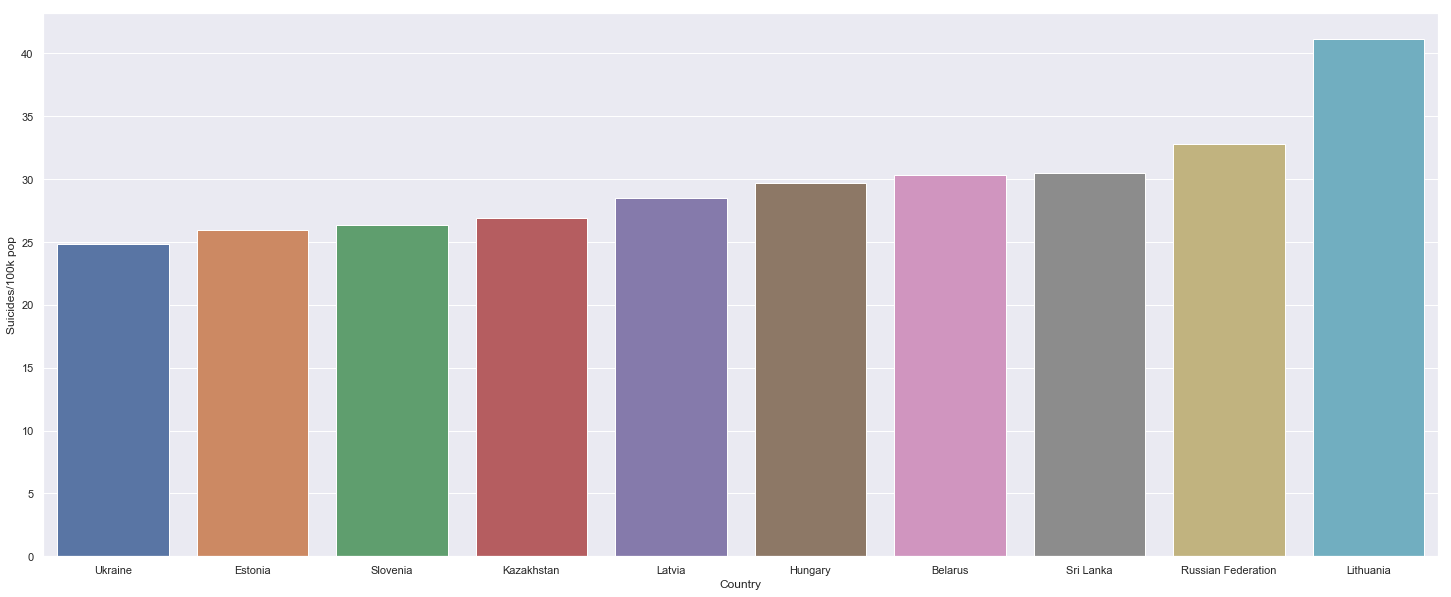

In [38]:
sns.set(rc={'figure.figsize':(25,10)})
plot = sns.barplot(x='Country', y='Suicides/100k pop', data=country_df[-10:])
fig = plot.get_figure()
fig.savefig("Top_10_Suicide.png")

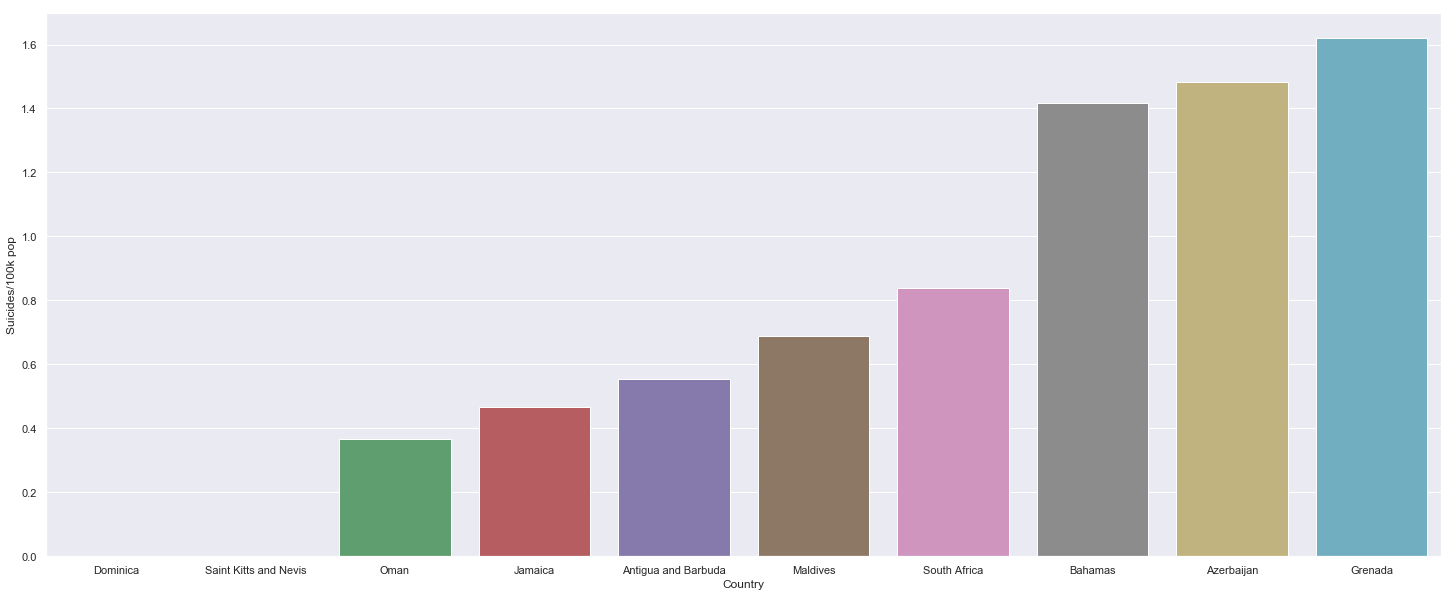

In [39]:
sns.set(rc={'figure.figsize':(25,10)})
plot = sns.barplot(x='Country', y='Suicides/100k pop', data=country_df[:10])
fig = plot.get_figure()
fig.savefig("Bottom_10_Suicide.png")

# Now let us look at 2015 alone!

In [40]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [41]:
recent_suicide_df = suicide_df[suicide_df['year'] == 2015]

In [42]:
recent_suicide_df['country'].nunique()

62

In [43]:
recent_suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
576,Antigua and Barbuda,2015,female,55-74 years,1,6403,15.62,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers
577,Antigua and Barbuda,2015,female,15-24 years,0,8561,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
578,Antigua and Barbuda,2015,female,25-34 years,0,7740,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
579,Antigua and Barbuda,2015,female,35-54 years,0,15323,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
580,Antigua and Barbuda,2015,female,5-14 years,0,8239,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z


In [44]:
recent_countries = recent_suicide_df['country'].unique()
gdp = []
total_suicide = []
total_population = []

for country in recent_countries:
    s = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == 2015)]['suicides_no'].sum()
    total_suicide.append(s)
    
    t = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == 2015)]['population'].sum()
    total_population.append(t)
    
    g = suicide_df[(suicide_df['country'] == country) & (suicide_df['year'] == 2015)]['gdp_per_capita'].unique()[0]
    gdp.append(g)

In [45]:
recent_total_suicide_df = pd.DataFrame([recent_countries, gdp, total_suicide, total_population]).transpose()
recent_total_suicide_df.columns = ['Country', 'GDP per Capita', 'Total Suicide', 'Total Population']

In [46]:
recent_total_suicide_df['Suicides/100k pop'] = recent_total_suicide_df.apply(lambda x: (x['Total Suicide'] / x['Total Population']) * 100000, axis=1)

In [47]:
recent_total_suicide_df.head()

,Country,GDP per Capita,Total Suicide,Total Population,Suicides/100k pop
0,Antigua and Barbuda,14853,1,91889,1.088270
1,Argentina,14981,3073,39699624,7.740627
2,Armenia,3775,74,2795335,2.647268
3,Australia,60656,3027,22240785,13.610131
4,Austria,46484,1251,8219386,15.220115


In [48]:
import pycountry

def get_country_code(country):
    mapping = {country.name: country.alpha_3 for country in pycountry.countries}
    return mapping.get(country)

In [49]:
recent_total_suicide_df['CODE'] = recent_total_suicide_df['Country'].apply(get_country_code)

In [50]:
recent_total_suicide_df.head()

,Country,GDP per Capita,Total Suicide,Total Population,Suicides/100k pop,CODE
0,Antigua and Barbuda,14853,1,91889,1.088270,ATG
1,Argentina,14981,3073,39699624,7.740627,ARG
2,Armenia,3775,74,2795335,2.647268,ARM
3,Australia,60656,3027,22240785,13.610131,AUS
4,Austria,46484,1251,8219386,15.220115,AUT


In [51]:
# Now we can do some geographical plotting
data = dict(
        type = 'choropleth',
        locations = recent_total_suicide_df['CODE'],
        z = recent_total_suicide_df['Suicides/100k pop'],
        text = recent_total_suicide_df['Country'],
        colorbar = {'title' : 'Suicide Rates'},
      ) 

layout = dict(
    title = 'Suicide Rates',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap)

In [52]:
data = dict(
        type = 'choropleth',
        locations = recent_total_suicide_df['CODE'],
        z = recent_total_suicide_df['GDP per Capita'],
        text = recent_total_suicide_df['Country'],
        colorbar = {'title' : 'GDP per Capita'},
      ) 

layout = dict(
    title = 'GDP per Capita',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap)

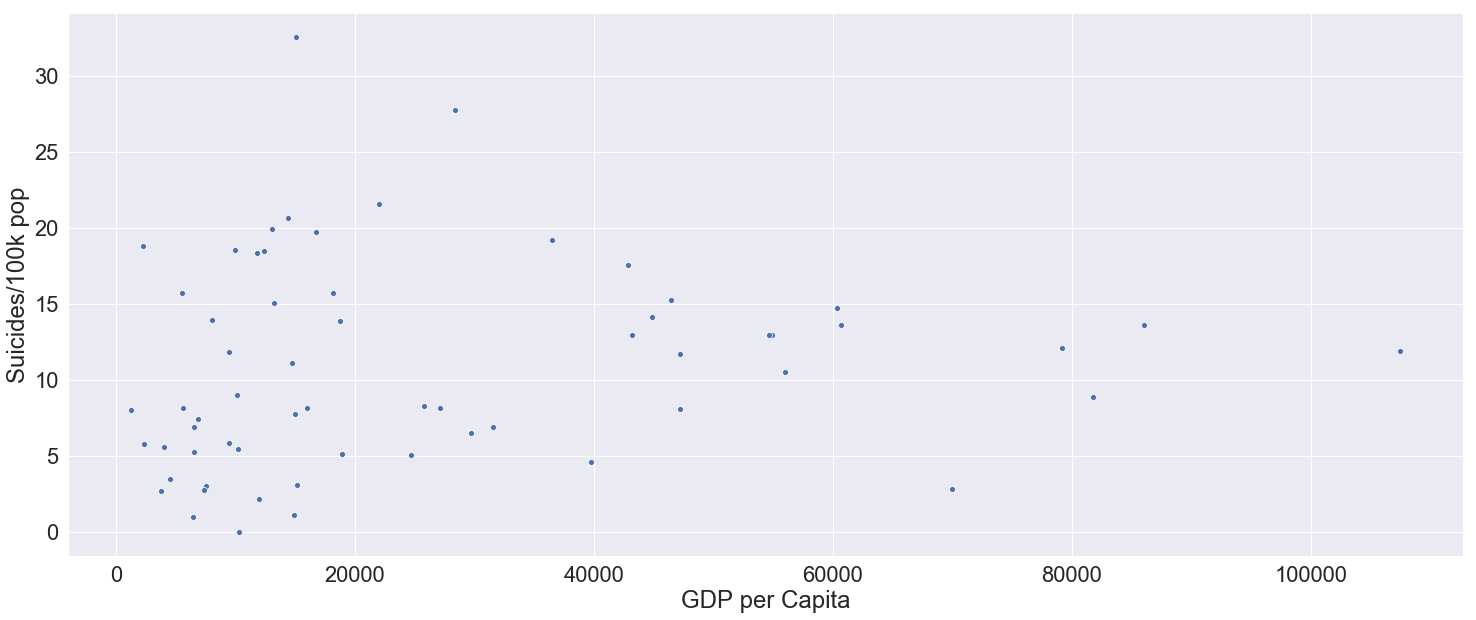

In [53]:
sns.set(font_scale=2)
plot = sns.scatterplot(x="GDP per Capita", y="Suicides/100k pop", data=recent_total_suicide_df)
fig = plot.get_figure()
fig.savefig("2015_GDP_vs_Suicide.png")

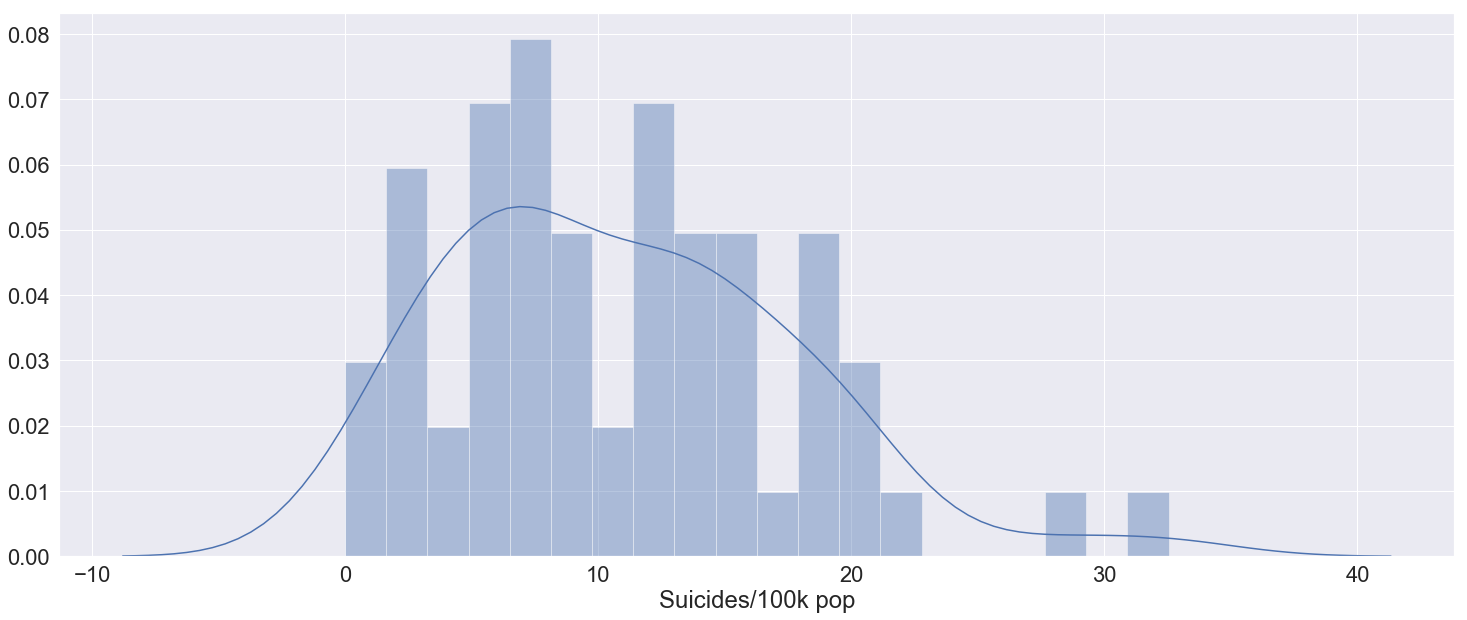

In [54]:
sns.distplot(recent_total_suicide_df['Suicides/100k pop'], bins=20)

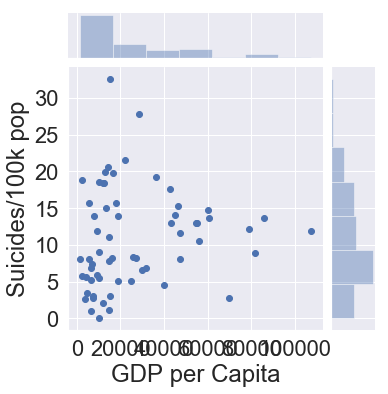

In [55]:
recent_total_suicide_df['GDP per Capita'] = recent_total_suicide_df['GDP per Capita'].astype(float)

sns.jointplot(x="GDP per Capita", y="Suicides/100k pop", data=recent_total_suicide_df, kind='scatter')

sns.set(rc={'figure.figsize':(25,10)})

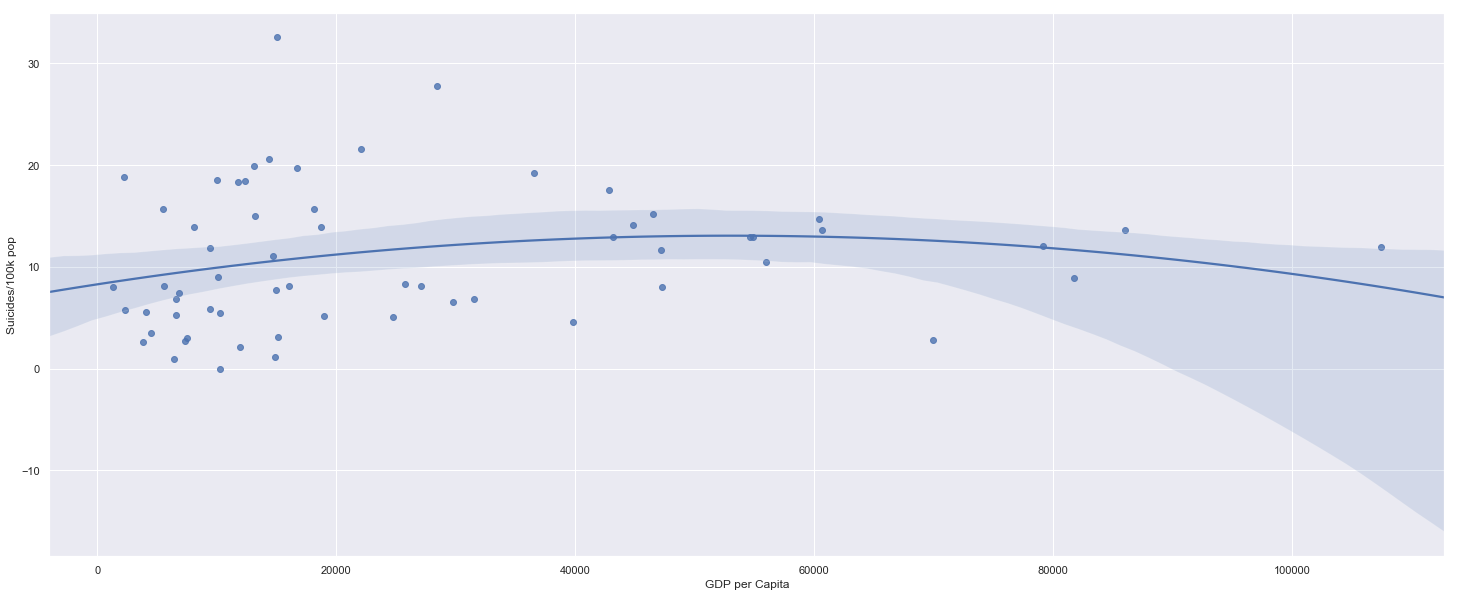

In [56]:
sns.regplot(x="GDP per Capita", y="Suicides/100k pop", data=recent_total_suicide_df, order=2)

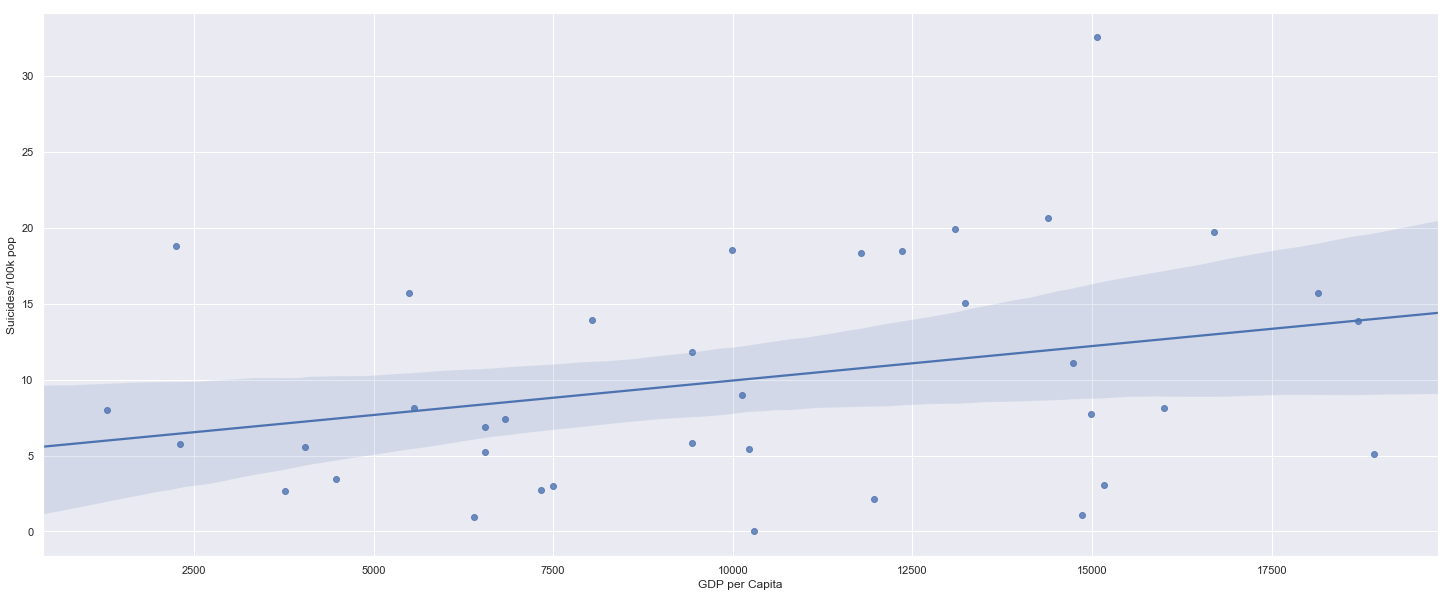

In [57]:
sns.regplot(x="GDP per Capita", y="Suicides/100k pop", data=recent_total_suicide_df[recent_total_suicide_df['GDP per Capita'] <= 20000], order=1)

## Now let us look at the happiness dataframe

In [58]:
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [59]:
happy_df['CODE'] = happy_df['Country'].apply(get_country_code)

In [60]:
happy_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,CODE
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,CHE
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,ISL
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,DNK
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NOR
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,CAN


In [61]:
data = dict(
        type = 'choropleth',
        locations = happy_df['CODE'],
        z = happy_df['Happiness Score'],
        text = happy_df['Country'],
        colorbar = {'title' : 'Happiness Scores'}
)

layout = dict(
    title = 'Happiness Scores',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap)

In [62]:
recent_countries = recent_suicide_df['country'].unique()
gdp = []
total_suicide = []
total_population = []

for country in recent_countries:
    s = suicide_df[(suicide_df['country'] == country)]['suicides_no'].sum()
    total_suicide.append(s)
    
    t = suicide_df[(suicide_df['country'] == country)]['population'].sum()
    total_population.append(t)

In [63]:
overall_total_suicide_df = pd.DataFrame([recent_countries, total_suicide, total_population]).transpose()
overall_total_suicide_df.columns = ['Country', 'Total Suicide', 'Total Population']

In [64]:
overall_total_suicide_df['Suicides/100k pop'] = overall_total_suicide_df.apply(lambda x: (x['Total Suicide'] / x['Total Population']) * 100000, axis=1)
overall_total_suicide_df['CODE'] = overall_total_suicide_df['Country'].apply(get_country_code)

In [65]:
data = dict(
        type = 'choropleth',
        locations = overall_total_suicide_df['CODE'],
        z = overall_total_suicide_df['Suicides/100k pop'],
        text = overall_total_suicide_df['Country'],
        colorbar = {'title' : 'Overall Suicide Rates'}
)

layout = dict(
    title = 'Overall Suicide Rates',
    geo = dict(
        showframe = False,
        projection = {'type':'natural earth'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
py.iplot(choromap)

## Going back to look at Male vs Female Suicide for different age groups

In [13]:
years = suicide_df['year'].unique()
malesuicide1 = []
malesuicide2 = []
malesuicide3 = []
malesuicide4 = []
malesuicide5 = []
malesuicide6 = []

for year in years:
    suicides = suicide_df[(suicide_df['age'] == '5-14 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'male') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    malesuicide1.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '15-24 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'male') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    malesuicide2.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '25-34 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'male') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    malesuicide3.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '35-54 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'male') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    malesuicide4.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '55-74 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'male') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    malesuicide5.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '75+ years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'male') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    malesuicide6.append(suicides)

In [14]:
male_df = pd.DataFrame([years, malesuicide1, malesuicide2, malesuicide3, malesuicide4, malesuicide5, malesuicide6]).transpose()
male_df.columns = ['Year', '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
male_df.sort_values(by='Year', inplace=True)
male_df = male_df.iloc[:-1]

In [15]:
male_df.head()

,Year,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
22,1985,205,4267,5134,6053,5302,2177
23,1986,199,4276,5450,6450,5500,2340
0,1987,199,4109,5370,6569,5482,2532
1,1988,181,4143,5463,6528,5198,2548
2,1989,184,4106,5339,6814,5185,2462


In [16]:
years = suicide_df['year'].unique()
femalesuicide1 = []
femalesuicide2 = []
femalesuicide3 = []
femalesuicide4 = []
femalesuicide5 = []
femalesuicide6 = []

for year in years:
    suicides = suicide_df[(suicide_df['age'] == '5-14 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'female') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    femalesuicide1.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '15-24 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'female') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    femalesuicide2.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '25-34 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'female') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    femalesuicide3.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '35-54 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'female') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    femalesuicide4.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '55-74 years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'female') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    femalesuicide5.append(suicides)
    
    suicides = suicide_df[(suicide_df['age'] == '75+ years') & (suicide_df['year'] == year) & (suicide_df['sex'] == 'female') & (suicide_df['country'] == 'United States')]['suicides_no'].sum()
    femalesuicide6.append(suicides)

In [17]:
female_df = pd.DataFrame([years, femalesuicide1, femalesuicide2, femalesuicide3, femalesuicide4, femalesuicide5, femalesuicide6]).transpose()
female_df.columns = ['Year', '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
female_df.sort_values(by='Year', inplace=True)
female_df = female_df.iloc[:-1]

In [18]:
female_df.head()

,Year,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
22,1985,73,854,1242,2105,1568,466
23,1986,56,844,1261,2299,1696,521
0,1987,52,815,1285,2270,1596,504
1,1988,62,786,1247,2209,1504,519
2,1989,56,764,1226,2159,1432,491


In [19]:
# NORMALIZING THE DATAFRAME
x = male_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_male_df = pd.DataFrame(x_scaled)

x = female_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_female_df = pd.DataFrame(x_scaled)

normalized_male_df.columns = ['Year', '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
normalized_female_df.columns = ['Year', '5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



## For Simplicity of Plotting, we can switch between plotting normalized and unnormalized values through changing the DataFrame name

In [20]:
age1 = go.Scatter(
    x = normalized_male_df['Year'],
    y = normalized_male_df['5-14 years'],
    mode = 'lines+markers',
    name = 'Male 5-14 years'
)

age2 = go.Scatter(
    x = normalized_female_df['Year'],
    y = normalized_female_df['5-14 years'],
    mode = 'lines+markers',
    name = 'Female 5-14 years'
)

data = [age1, age2]

# plotting the data

py.iplot(data)

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
age1 = go.Scatter(
    x = normalized_male_df['Year'],
    y = normalized_male_df['15-24 years'],
    mode = 'lines+markers',
    name = 'Male 15-24 years'
)

age2 = go.Scatter(
    x = normalized_female_df['Year'],
    y = normalized_female_df['15-24 years'],
    mode = 'lines+markers',
    name = 'Female 15-24 years'
)

data = [age1, age2]

# plotting the data

py.iplot(data)

In [22]:
age1 = go.Scatter(
    x = normalized_male_df['Year'],
    y = normalized_male_df['25-34 years'],
    mode = 'lines+markers',
    name = 'Male 25-34 years'
)

age2 = go.Scatter(
    x = normalized_female_df['Year'],
    y = normalized_female_df['25-34 years'],
    mode = 'lines+markers',
    name = 'Female 25-34 years'
)

data = [age1, age2]

# plotting the data

py.iplot(data)

In [23]:
age1 = go.Scatter(
    x = normalized_male_df['Year'],
    y = normalized_male_df['35-54 years'],
    mode = 'lines+markers',
    name = 'Male 35-54 years'
)

age2 = go.Scatter(
    x = normalized_female_df['Year'],
    y = normalized_female_df['35-54 years'],
    mode = 'lines+markers',
    name = 'Female 35-54 years'
)

data = [age1, age2]

# plotting the data

py.iplot(data)

In [24]:
age1 = go.Scatter(
    x = normalized_male_df['Year'],
    y = normalized_male_df['55-74 years'],
    mode = 'lines+markers',
    name = 'Male 55-74 years'
)

age2 = go.Scatter(
    x = normalized_female_df['Year'],
    y = normalized_female_df['55-74 years'],
    mode = 'lines+markers',
    name = 'Female 55-74 years'
)

data = [age1, age2]

# plotting the data

py.iplot(data)

In [25]:
age1 = go.Scatter(
    x = normalized_male_df['Year'],
    y = normalized_male_df['75+ years'],
    mode = 'lines+markers',
    name = 'Male 75+ years'
)

age2 = go.Scatter(
    x = normalized_female_df['Year'],
    y = normalized_female_df['75+ years'],
    mode = 'lines+markers',
    name = 'Female 75+ years'
)

data = [age1, age2]

# plotting the data

py.iplot(data)